# Project: Investigate A "No Show Appointments 2016 Dataset"

<a id='intro'></a>
## Introduction

### Dataset Description
> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Question(s) for Analysis
> 1- Does the receiving SMS ('SMS_received' column) affects show up rate?
2- Does the gender of the patient ('Gender' column) affects show up rate?
3- Does the patient's enrollment in Brasilian welfare program 'Bolsa Família ('Scholarship' column) affects show up rate?
4- Does the high blood pressure status of the patient ('Hypertension' column) affects show up rate?
5- Does the diabetes status of the patient ('Diabetes' column) affects show up rate?
6- Does the patient's alcoholism status ('Alcoholism' column) affects show up rate?
7- Does the location of the neighbourhood hospitals ('Neighbourhood' column) affects show up rate?
8- Does the age of the patient ('Age' column) affects show up rate?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
DATASET_PATH = "Dataset_NoShowAppointments_kagglev2_may_2016.csv"

data_df = pd.read_csv(DATASET_PATH)
data_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
data_df.shape

(110527, 14)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183CF7B2320>,
      dtype=object)

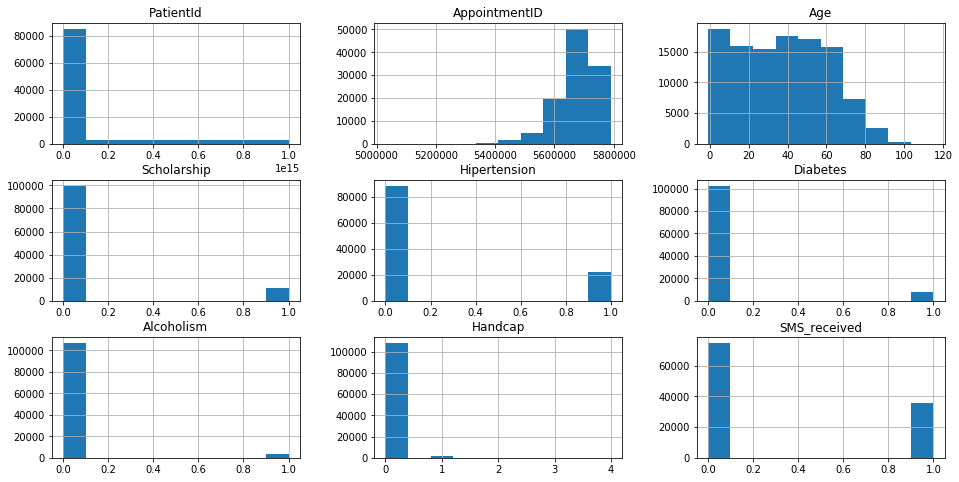

In [5]:
data_df.hist(figsize=(16,8))

#### Checking the missing values

In [6]:
data_df.isnull().sum().any()

False

#### Checking the duplicated values

In [7]:
data_df.duplicated().sum()

0

#### Changing some columns' names (To be more readable)

In [8]:
data_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> Columns like 'Hipertension' and 'Handcap' are written worng
> Column like 'No-show' will be much better if we use underscore to be usable in pandas dataframes.

In [9]:
data_df.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap", "No-show": "No_show"}, inplace=True)
data_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

#### Checking for duplicated patients with more than one appointment

In [10]:
data_df.PatientId.nunique() == data_df.shape[0], data_df.PatientId.nunique()

(False, 62299)

In [11]:
data_df[['PatientId', 'No_show']].duplicated().sum()

38710

#### Checking some information about other numerical data

In [12]:
data_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Minimum value of "Age" column is -1, which is unlogical value.
> Maximum value of "Handicap" column is 4, which is unlogical value (Because it is a binary column with 0's and 1's only)

## Data Cleaning

#### Removing incorrect/unlogical data (Data row which its 'Age=-1' & 'Handcap=4'

In [13]:
data_df.Age.describe().min(), data_df.Handicap.describe()[-1]

(-1.0, 4.0)

In [14]:
data_df.drop(data_df[data_df.Age == -1].index, inplace=True)
data_df.drop(data_df[data_df.Handicap > 1].index, inplace=True)
data_df.Age.describe().min(), data_df.Handicap.describe()[-1]

(0.0, 1.0)

In [15]:
data_df.Handicap.describe()

count    110327.000000
mean          0.018509
std           0.134782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Handicap, dtype: float64

#### Removing duplicated patients with more than one appointment

In [16]:
# For example:
#data_df[data_df.PatientId == 29872499824296]

In [17]:
data_df.drop_duplicates(['PatientId', 'No_show'], inplace=True)
data_df.shape

(71689, 14)

In [18]:
#data_df[data_df.PatientId == 29872499824296]

#### Removing unnecessary columns/features

In [19]:
data_df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
data_df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

### Showing our dataset after cleaning phase

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183D09FA518>,
      dtype=object)

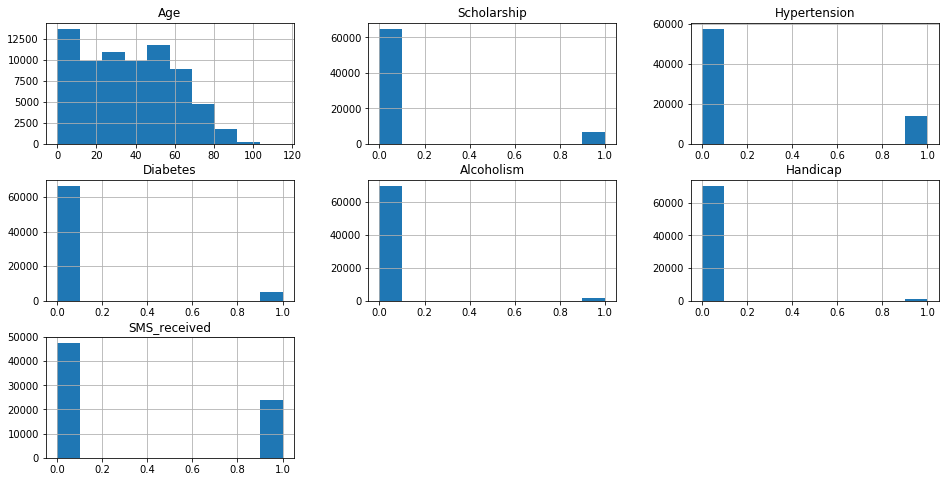

In [20]:
data_df.hist(figsize=(16,8))

In [21]:
data_df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

In [22]:
binaryColumns = data_df.columns[3:-1].insert(0, "Gender")
binaryColumns

Index(['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received'],
      dtype='object')

#### Splitting the dataset to two, one for showing patients, and the other to non showing patients

In [23]:
unique_show = data_df.No_show.unique()
unique_show

array(['No', 'Yes'], dtype=object)

In [24]:
nonshowing_df = data_df[data_df.No_show == unique_show[1]]
nonshowing_df.shape

(17632, 10)

In [25]:
showing_df = data_df[data_df.No_show == unique_show[0]]
showing_df.shape

(54057, 10)

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

### Questions: Are 'Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', and 'SMS_received' affect the showing up?
    (Q1:Q6)

In [26]:
def investigating2ValuesColumns(showing_df, nonshowing_df, binaryColumns, n):
    fig, axs = plt.subplots(n, 2, figsize=(14,14),dpi=144)
    for i in range(n):
        axs[i, 0].pie(showing_df[binaryColumns[i]].value_counts(), labels=showing_df[binaryColumns[i]].value_counts().index,
                      colors=['r', 'b'], autopct='%1.1f%%', textprops={'color': "k", "size":"x-small"}, explode=(0, 0.1), shadow=True)
        axs[i, 1].pie(nonshowing_df[binaryColumns[i]].value_counts(), labels=nonshowing_df[binaryColumns[i]].value_counts().index,
                      colors=['r','b'],autopct='%1.1f%%', textprops={'color': "k", "size":"x-small"}, explode=(0, 0.1), shadow=True)

        axs[i, 0].legend(title=binaryColumns[i], loc='upper right', bbox_to_anchor=(3, 0.8))
        axs[i, 0].title.set_text("Show")
        axs[i, 1].title.set_text("No Show")

    plt.show()

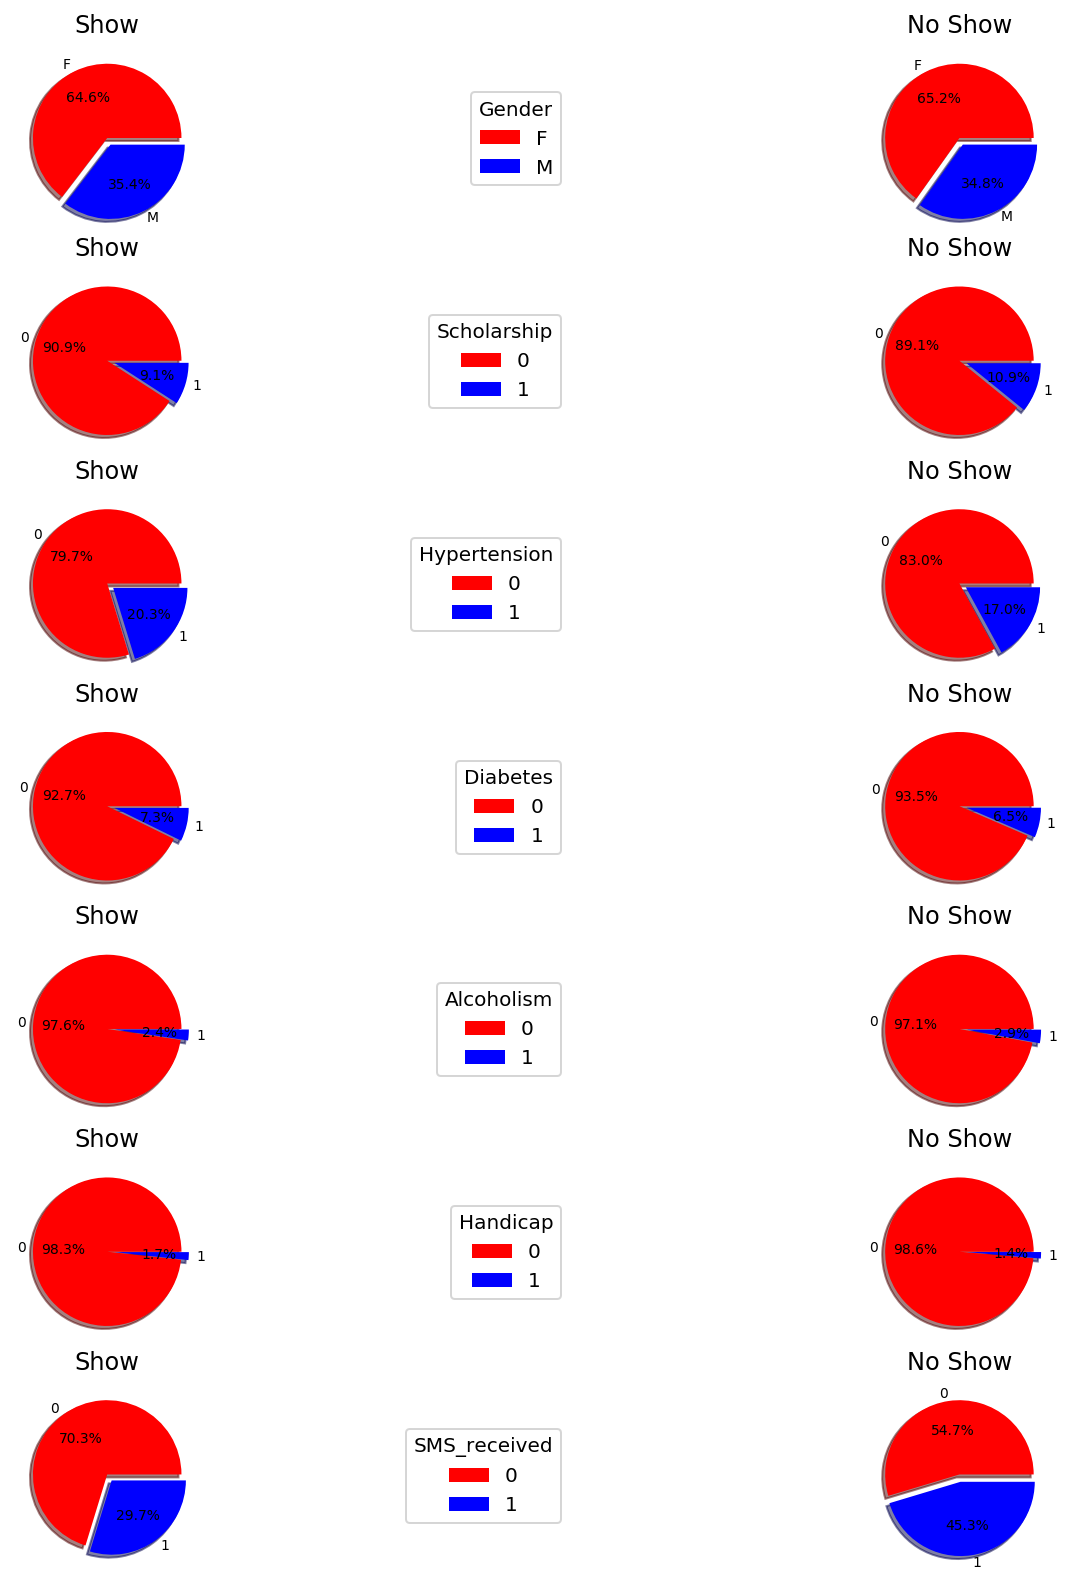

In [27]:
investigating2ValuesColumns(showing_df, nonshowing_df, binaryColumns, len(binaryColumns))

### Questions: Are 'Age', and 'Neighbourhood' affect the showing up?
    (Q7,Q8)

In [28]:
showing_df["Age"].unique().min(), showing_df["Age"].unique().max()

(0, 115)

In [29]:
age_bins = [0,20,40,60,80,100,115]
age_bins_labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-115']

showing_df['Age_Bins'] = pd.cut(x=showing_df['Age'], bins=age_bins, labels=age_bins_labels)
nonshowing_df['Age_Bins'] = pd.cut(x=nonshowing_df['Age'], bins=age_bins, labels=age_bins_labels)
showing_df['Age_Bins']

C:\Users\20122\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\20122\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0         60-80
1         40-60
2         60-80
3          0-20
4         40-60
          ...  
110518    40-60
110520    40-60
110521    40-60
110522    40-60
110524    20-40
Name: Age_Bins, Length: 54057, dtype: category
Categories (6, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100' < '100-115']

In [30]:
def investigating(showing_df, nonshowing_df, col_name):
    plt.figure(figsize=[18, 4])
    plt.xticks(rotation=90)
    showing_df[col_name].value_counts().plot(kind="bar", color='r', label="Show")
    nonshowing_df[col_name].value_counts().plot(kind="bar", color='b', label="No Show")
    plt.xlabel(col_name)
    plt.ylabel("Patient Counts")
    plt.legend()
    plt.show()

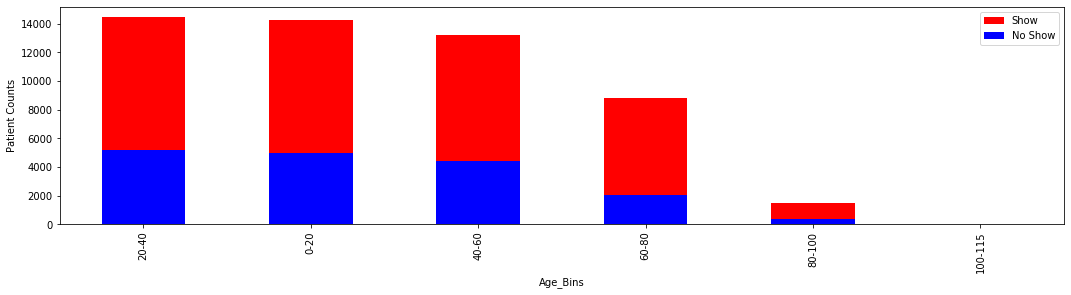

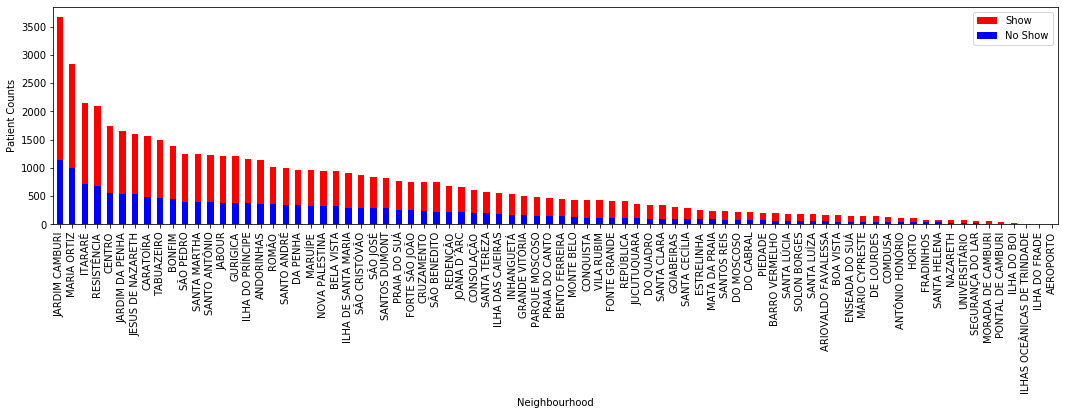

In [31]:
for col in ["Age_Bins", "Neighbourhood"]:
    investigating(showing_df, nonshowing_df, col)

In [32]:
rates = []
for i in range(len(age_bins_labels)):
    rates.append(showing_df[showing_df.Age_Bins == age_bins_labels[i]].Age_Bins.count() / nonshowing_df[nonshowing_df.Age_Bins == age_bins_labels[i]].Age_Bins.count())

rates

[2.8428828109403073,
 2.551272166538165,
 3.264619552946489,
 4.264306498545102,
 4.045945945945946,
 4.0]

<a id='conclusions'></a>
## Conclusions

> Receiving an SMS doesn't increase the chance/possibility for the patients of attending the appointment.
     (The number of patients who received SMS and didn't show the appointment is approximately equal to who didn't receive and didn't show)

> The gender, diabetes, alcoholism and handicap don't affect on the chance of attending the patient's appointment.

> The location of hospitals don't reflect any relationship with the show up rate, we need to know the location of each patient with the hospital location to determine is that affect on the chance of attending the patient's appointment or not.

> There is no clear relationship between the age of patients and the showing rate, but from some statical analysis we get that the patients in their 60s and older are more likely to show up their appointments.